<a href="https://colab.research.google.com/github/mhyubr/Basic_Machine_Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression

## Dataset

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/mhyubr/Basic_Machine_Learning/main/dataset/bensin.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,Liter,Kilometer
0,20,142.0
1,25,177.0
2,20,144.0
3,30,203.0
4,40,273.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Liter      65 non-null     int64  
 1   Kilometer  65 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


## Split Dataset

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
liter = df[['Liter']]
kilometer = df[['Kilometer']]

X_train, X_test, y_train, y_test = train_test_split(liter, kilometer, test_size=0.2, random_state=0)

print(X_train.size, X_test.size)

52 13


## Train Model

In [7]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()
model.fit(X_train.values, y_train)

LinearRegression()

## Visualization Model

In [16]:
import seaborn as sns

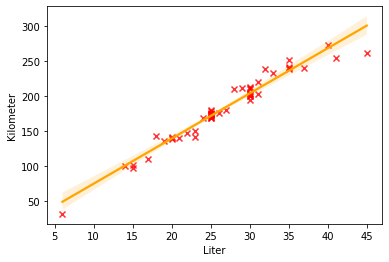

In [17]:
sns.regplot(x=X_train, y=y_train, data=df, scatter_kws={"color" : "red"}, line_kws={"color" : "orange"}, marker='x')

## Scoring Model

In [20]:
model.score(X_test.values, y_test)

0.9798523775622333

## Predict Data

In [19]:
jarak = model.predict([[60]])
print(jarak)

[[398.13897723]]


# Multiple Linear Regression

## Dataset

In [1]:
import pandas as pd

In [3]:
link = 'https://raw.githubusercontent.com/mhyubr/Basic_Machine_Learning/main/dataset/bensin2.csv'
bensin2 = pd.read_csv(link) 

In [4]:
bensin2.head()

,Liter,Penumpang,Bagasi,Kecepatan,RPM,Suhu,Kilometer
0,20,1,0,42,3000,29,142
1,25,2,15,50,4000,36,177
2,20,4,10,50,3000,24,144
3,30,5,25,50,3000,18,203
4,40,1,40,50,3200,30,273


In [6]:
bensin2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Liter      65 non-null     int64 
 1   Penumpang  65 non-null     int64 
 2   Bagasi     65 non-null     int64 
 3   Kecepatan  65 non-null     int64 
 4   RPM        65 non-null     object
 5   Suhu       65 non-null     int64 
 6   Kilometer  65 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.7+ KB


In [7]:
import seaborn as sns

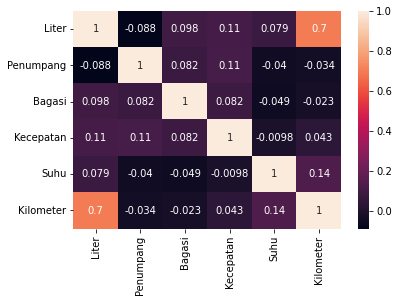

In [12]:
sns.heatmap(bensin2.corr(), annot=True)

## Split Dataset

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
X = bensin2[['Liter', 
             'Penumpang', 
             'Kecepatan', 
             'Suhu']] 
             
y = bensin2[['Kilometer']]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.size)
print(X_test.size)

208
52


## Train Model

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

## Scoring

In [24]:
from sklearn.metrics import r2_score

In [25]:
y_predict = model2.predict(X_test)
y_predict

array([[ 60.85696229],
       [135.35030115],
       [154.06234992],
       [144.6835401 ],
       [110.12207127],
       [253.78391867],
       [174.82817365],
       [225.03084945],
       [ 62.36559799],
       [193.17736664],
       [160.32474706],
       [105.69723644],
       [176.1365958 ]])

In [26]:
r2_score(y_test, y_predict)

0.44272592523608034